In [1]:
import pandas as pd

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [6]:
from sklearn import tree

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.metrics import RocCurveDisplay

In [9]:
from sklearn.svm import SVC

In [10]:
import sklearn

In [11]:
from matplotlib import pyplot as plt

In [12]:
data=pd.read_csv('Raisin_Dataset.csv')

In [13]:
data.Class=pd.Categorical(data.Class)

In [14]:
data["Class"]=data.Class.cat.codes

In [15]:
X=data.drop(columns='Class')
Y=data.Class
X_train, X_valid, Y_train, Y_valid=train_test_split(X, Y, test_size=0.3, random_state=35)

In [17]:
model=LogisticRegression()
model.fit(X_train, Y_train)

D:\Docs\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
print("Valid train: {:.4f}".format(model.score(X_train, Y_train)))
print("Valid test: {:.4f}".format(model.score(X_valid, Y_valid)))

Правильность на обучающем наборе: 0.87
Правильность на тестовом наборе: 0.82


In [24]:
for C in [100,0.01]:
    model=LogisticRegression(C=C)
    model.fit(X_train, Y_train)
    print(f"\nC={C}:")
    print("Valid train: {:.4f}".format(model.score(X_train, Y_train)))
    print("Valid test: {:.4f}".format(model.score(X_valid, Y_valid)))


C=100:
Valid train: 0.8651
Valid test: 0.8296

C=0.01:
Valid train: 0.8651
Valid test: 0.8296


In [25]:
model=LogisticRegression(penalty='l2',C=0.1);
model.fit(X_train, Y_train)

LogisticRegression(C=0.1)

In [26]:
y_pred=model.predict(X_valid);

In [31]:
print("\nQuality metrics for regulation with l2 & C=0.1:")
print("Accuracy: {:.4f}".format(accuracy_score(Y_valid, y_pred)))
print("Recall: {:.4f}".format(recall_score(Y_valid, y_pred)))
print("Precision: {:.4f}".format(precision_score(Y_valid, y_pred)))
print("Error_matrix:")
print(confusion_matrix(Y_valid, y_pred))


Quality metrics for regulation with l2 и C=0.1:
Accuracy: 0.8296
Recall: 0.8603
Precision: 0.8125
Error_matrix:
[[107  27]
 [ 19 117]]


In [33]:
model_svc=SVC()
model_svc.fit(X_train, Y_train)

SVC()

In [34]:
print("Valid train: {:.4f}".format(model_svc.score(X_train, Y_train)))
print("Valid test: {:.4f}".format(model_svc.score(X_valid, Y_valid)))

Valid train: 0.8254
Valid test: 0.8000


In [36]:
svc_params = {"C": [0.1, 1, 10], "gamma": [0.2,0.6, 1]}
svc_grid = GridSearchCV(model_svc, svc_params, cv=5, n_jobs=-1)
svc_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.2, 0.6, 1]})

In [44]:
print("Best GridSearch: {:.4f}".format(svc_grid.best_score_))
print("Best params: ", svc_grid.best_params_)

Best GridSearch: 0.4984
Best params:  {'C': 0.1, 'gamma': 0.2}


In [45]:
best_model = SVC(**svc_grid.best_params_)
best_model.fit(X_train, Y_train)

SVC(C=0.1, gamma=0.2)

In [46]:
print("Valid train: {:.4f}".format(best_model.score(X_train, Y_train)))
print("Valid test: {:.4f}".format(best_model.score(X_valid, Y_valid)))
y_predicted=best_model.predict(X_valid)
print("\nQuality metrics for best params:")
print("Accuracy: {:.4f}".format(accuracy_score(Y_valid, y_predicted)))
print("Recall: {:.4f}".format(recall_score(Y_valid, y_predicted)))
print("Precision: {:.4f}".format(precision_score(Y_valid, y_predicted)))
print("Error_matrix:")
print(confusion_matrix(Y_valid, y_predicted));

Valid train: 0.5016
Valid test: 0.4963

Quality metrics for best params:
Accuracy: 0.4963
Recall: 0.0000
Precision: 0.0000
Error_matrix:
[[134   0]
 [136   0]]


D:\Docs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
des_tree=DecisionTreeClassifier()
des_tree=des_tree.fit(X_train, Y_train)
print("Valid train: {:.4f}".format(des_tree.score(X_train, Y_train)))
print("Valid test: {:.4f}".format(des_tree.score(X_valid, Y_valid)))
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
print("Valid train: {:.4f}".format(knn.score(X_train, Y_train)))
print("Valid test: {:.4f}".format(knn.score(X_valid, Y_valid)))

Valid train: 1.0000
Valid test: 0.7815
Valid train: 0.8873
Valid test: 0.8000


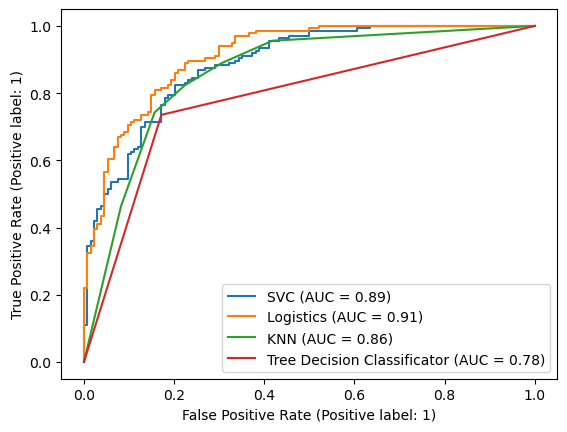

In [48]:
ax = plt.gca()
svc_disp = RocCurveDisplay.from_estimator(model_svc, X_valid, Y_valid, ax=ax, name="SVC")
disp = RocCurveDisplay.from_estimator(model, X_valid, Y_valid, ax=ax, name="Logistics")
knn_disp = RocCurveDisplay.from_estimator(knn, X_valid, Y_valid, ax=ax, name="KNN")
tree_disp = RocCurveDisplay.from_estimator(des_tree, X_valid, Y_valid, ax=ax, name="Tree Decision Classificator")
plt.show();